In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from qiskit_aer import AerSimulator
from numpy import pi, random

![teleportion_circuit.jpg](https://learning-api.quantum.ibm.com/assets/a0857b3f-224f-4146-a41e-8c701020db0f?format=auto&quality=80)

In [10]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())

array([[-0.50879845+0.j        , -0.86074045+0.01581168j],
       [-0.80812516+0.29674544j,  0.47431431-0.18412441j]])

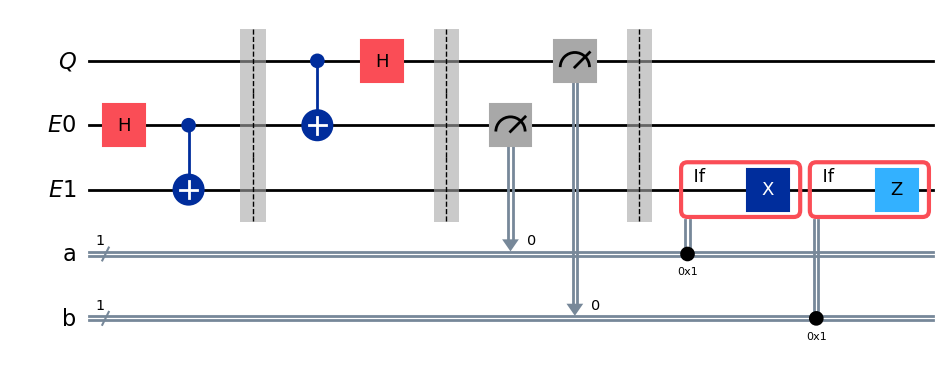

In [19]:
qubit = QuantumRegister(1, "Q") # teleporting qubit
ebit0 = QuantumRegister(1, "E0") # alice
ebit1 = QuantumRegister(1, "E1") # bob
a = ClassicalRegister(1, "a") # contril X
b = ClassicalRegister(1, "b") # control Z

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# protocol.append(random_gate, qubit)

# prepare phi+
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier() # pi0

protocol.cx(qubit, ebit0) # pi1
protocol.h(qubit) # pi2
protocol.barrier()

protocol.measure(ebit0, a) # X
protocol.measure(qubit, b) # Z
protocol.barrier()

with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)
# protocol.barrier()

# protocol.append(random_gate.inverse(), ebit1)

display(protocol.draw('mpl'))

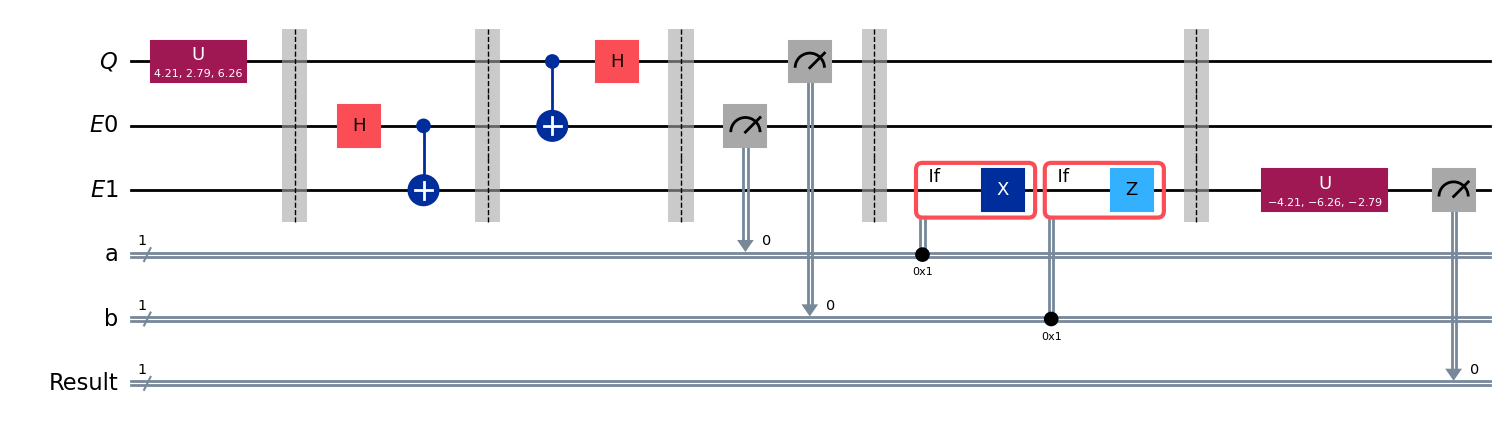

In [20]:
test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

test.append(random_gate, qubit)
test.barrier()

test = test.compose(protocol)
test.barrier()

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, 'Result')
test.add_register(result)
test.measure(ebit1, result)

display(test.draw('mpl'))

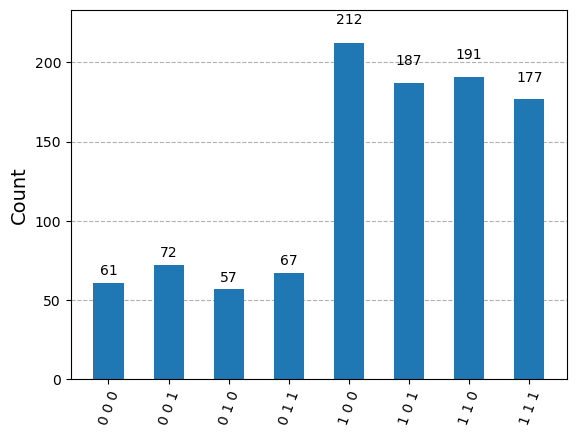

In [16]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

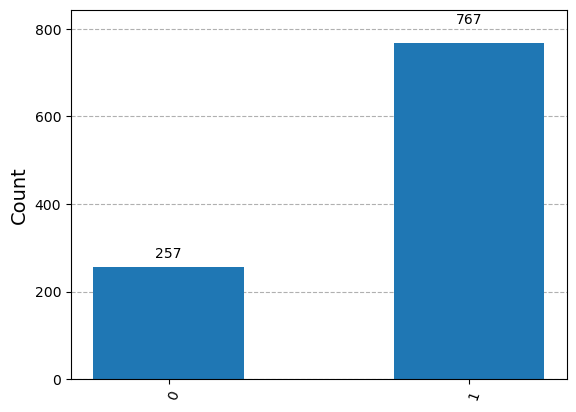

In [17]:

filtered_stats = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_stats))